# 7. Снижение размерности. Практика

✍ В предыдущих юнитах вы познакомились с алгоритмами снижения размерности, и теперь можно считать, что вы обладаете знаниями обо всех основных аспектах кластеризации и уменьшения размерности.

Давайте потренируемся и применим полученные знания для решения очередной практической задачи.

Представьте, что вы работаете в международной гуманитарной организации, главная задача которой — борьба с бедностью и помощь людям из наименее развитых стран. Для выполнения своей миссии ваша организация периодически финансирует различные проекты, поддерживающие нуждающиеся регионы.

Вы собрали 100 миллионов долларов и должны принять решение, как распределить эти деньги — в какие страны их направить в первую очередь. Как выбрать, кто сильнее всего нуждается в финансовой поддержке?

Конечно, можно взять страны с самыми низкими доходами населения или с самой маленькой продолжительностью жизни. А может, лучше помочь странам, у которых самая высокая инфляция? По отдельным признакам выбирать достаточно сложно — нам хотелось бы выявить группы стран, в которых в целом ситуация вызывает опасения по совокупности значений всех признаков.

Для решения этой задачи мы как раз и используем наши навыки в снижении размерности и кластеризации данных: попробуем выделить кластеры стран, схожих по своим характеристикам, и среди них выявить кластер особо нуждающихся.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
data = pd.read_csv('Country-data.zip')
data.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460


* country — название страны;
* child_mort — показатель смертности детей до 5 лет;
* exports — показатель экспорта на душу населения;
* health — показатель затрат на здравоохранение на душу населения;
* imports — показатель импорта на душу населения;
* Income — средний доход на душу населения;
* Inflation — годовой показатель инфляции;
* life_expec — средняя продолжительность жизни;
* total_fer — суммарный коэффициент рождаемости;
* gdpp — значение ВВП на душу населения.

**Задание 7.1**

Какова максимальная продолжительность жизни? Ответ округлите до одного знака после точки-разделителя.

In [3]:
data['life_expec'].max()

82.8

**Задание 7.2**

Чтобы получить более качественные результаты, необходимо стандартизировать данные. Используйте для этого StandardScaler. Примените его ко всем значениям признаков и впишите в качестве ответа значение первого признака для первого объекта (таким образом можно будет проверить, что вы всё сделали корректно). Ответ округлите до двух знаков после точки-разделителя. 

In [4]:
from sklearn.preprocessing import StandardScaler

X = data.drop('country',axis =1)  
y = data['country']

scaler = StandardScaler()
scaler.fit(X) 
X_norm = scaler.transform(X)  
print(round(X_norm[0][0], 2))

1.29


**Задание 7.3**

Как вы помните, нет смысла использовать сильно связанные друг с другом признаки, так как их можно преобразовать в один и таким образом уменьшить общее количество признаков. Давайте выясним, есть ли в данных такие признаки.

Постройте матрицу корреляций для всех признаков. Найдите максимальный коэффициент корреляции. Запишите его в качестве ответа, предварительно округлив до двух знаков после точки-разделителя.

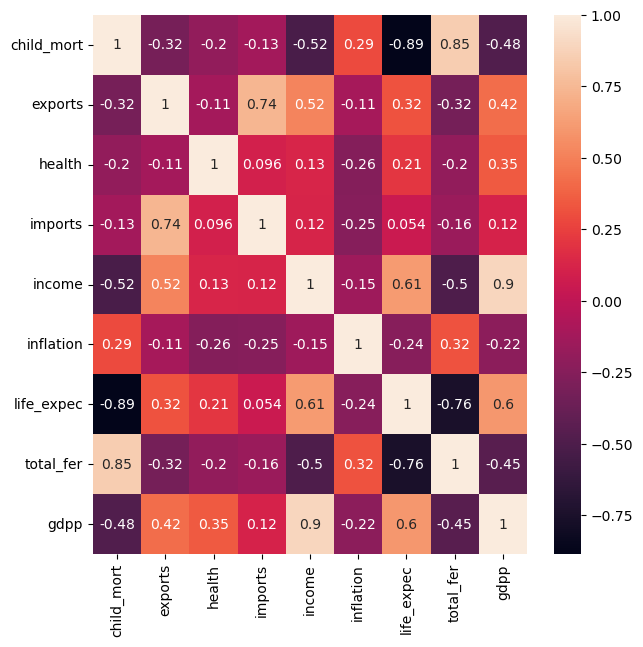

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

X_norm_df = pd.DataFrame(X_norm,columns=X.columns)
plt.figure(figsize = (7,7))       
sns.heatmap(X_norm_df.corr(),annot = True)
plt.show()

**Ответ**: 0.9

**Задание 7.4**

Теперь понизим размерность данных — возьмём для этого метод главных компонент (PCA) как самый простой и популярный.

Найдите минимальное число компонент, которые суммарно могут объяснить как минимум 90 % разброса данных.

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9, random_state=42).fit(X_norm)
len(pca.components_)

5

**Задание 7.5**

Оставьте только главные компоненты, выделенные в предыдущем задании. Какую долю дисперсии объясняет первая главная компонента? Ответ округлите до двух знаков после точки-разделителя.

In [7]:
pca.explained_variance_ratio_[0]

0.45951739786095885

**Задание 7.6**

Как вы помните, при создании компонент с помощью PCA они должны получиться независимыми, то есть мы не должны теперь наблюдать высоких коэффициентов корреляции.

Постройте матрицу корреляций. Сколько значений в ней превышают **0.001**, не считая единичных значений на главной диагонали?

<Axes: >

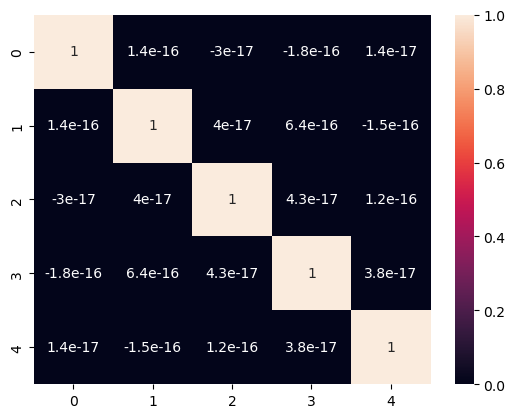

In [8]:
import numpy as np

X_after_pca = pca.fit_transform(X_norm)
corr_after_pca = np.corrcoef(X_after_pca.transpose())
sns.heatmap(corr_after_pca, annot=True)

Как видим, даже самый большой коэффициент корреляции практически неотличим от нуля — это значит, что мы всё сделали правильно, и теперь у нас есть пять независимых признаков, объясняющих до 90 % дисперсии.

**Задание 7.7**

Теперь, когда мы уменьшили размерность данных, можно переходить к кластеризации. Подберите оптимальное количество кластеров с помощью коэффициента силуэта, перебирая возможные значения от 2 до 10 включительно. Для кластеризации используйте алгоритм k-means++. В качестве значения параметра random_state возьмите число 1.

Судя по полученным результатам, сколько кластеров лучше всего взять?

In [9]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state = 1)
    kmeans.fit(X_after_pca)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_after_pca, cluster_labels)
    print(i, silhouette_avg)

2 0.30441994992318167
3 0.3079769786519014
4 0.32195837600498356
5 0.24979547358010437
6 0.25571481328184964
7 0.2758360485001675
8 0.2683030816676857
9 0.2646173587562106
10 0.2433095017766679


**Задание 7.8**

Теперь, когда оптимальное количество кластеров выбрано, реализуйте алгоритм k-means с этим параметром. В качестве значения random_state возьмите число 1.

В какой кластер попали страны, у которых самый высокий показатель детской смертности и самый низкий ВВП на душу населения?

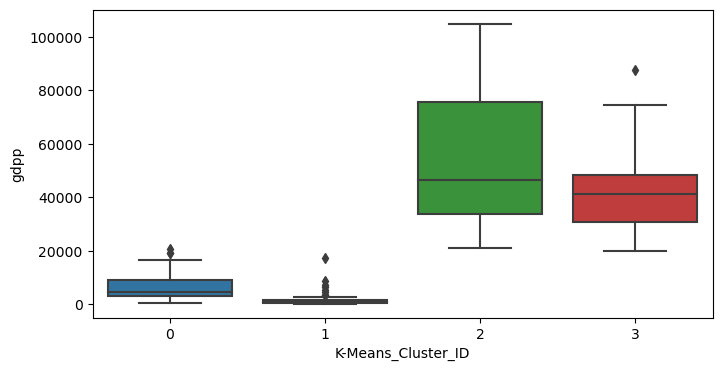

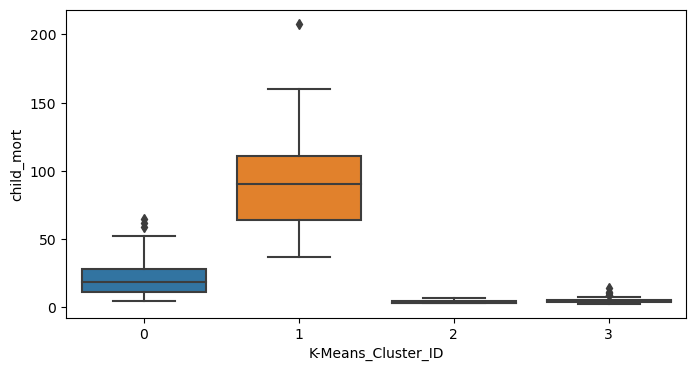

In [13]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(X_after_pca)

data['K-Means_Cluster_ID'] = kmeans.labels_
plt.figure(figsize=(8,4),dpi=100)
sns.boxplot(x='K-Means_Cluster_ID', y='gdpp', data=data)
plt.figure(figsize=(8,4),dpi=100)
sns.boxplot(x='K-Means_Cluster_ID', y='child_mort', data=data)
plt.show()

**Задание 7.9**

Итак, мы понимаем, что именно в выбранном нами кластере находятся страны, которые особенно остро нуждаются в финансовой помощи. Однако на все страны у нас не хватит ресурсов, поэтому давайте выберем из выделенного кластера три страны, в которых самая маленькая продолжительность жизни.

In [14]:
poorest_countries = data[data['K-Means_Cluster_ID'] == 1]
poorest_countries.sort_values(by = 'life_expec')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID
66,Haiti,208.0,15.30,6.91,64.7,1500,5.450,32.1,3.33,662,1
87,Lesotho,99.7,39.40,11.10,101.0,2380,4.150,46.5,3.30,1170,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1
166,Zambia,83.1,37.00,5.89,30.9,3280,14.000,52.0,5.40,1460,1
94,Malawi,90.5,22.80,6.59,34.9,1030,12.100,53.1,5.31,459,1
137,South Africa,53.7,28.60,8.94,27.4,12000,6.350,54.3,2.59,7280,1
106,Mozambique,101.0,31.50,5.21,46.2,918,7.640,54.5,5.56,419,1
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399,1
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.970,55.6,5.05,547,1
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1


По продолжительности жизни

In [61]:
poorest_countries.sort_values(by = 'life_expec').values[0][0]

'Botswana'

In [62]:
poorest_countries.sort_values(by = 'life_expec').values[1][0]

'Solomon Islands'

In [63]:
poorest_countries.sort_values(by = 'life_expec').values[2][0]

'Vanuatu'